# Milestone 2 Documenation: Group 6

**Team Members:**  
Kyra Ballard - *S.M. Applied Computation*  
Paul-Emile Landrin - *S.M. Applied Computation*  
Yaoyang Lin - *S.M. Applied Computation*  
Dan Park - *MS/MBA*  

CS 207 - Systems Development for Computational Science (Fall 2019)

## Introduction

This project aims to provide a working library for automatic differentiation. Automatic differentiation is a method for numerically calculating the derivative of a function. Derivative calculations are essential in many modern numerical algorithms, and automatic differentiation is one method that can quickly compute derivatives by executing elementary functions via the chain rule. 

Compared to other differentiation methods (such as symbolic/analytic differentiation or numerical differentiation), automatic differentiation boasts more efficient calculations and high accuracy to working precision. Symbolic differentiation requires mathematical expressions of derivatives to be kept throughout the process, which can lead to inefficient code. Numerical differentation is heavily reliant on an optimal value of `h`--too small or big values of `h` can lead to large floating point errors or inaccuracy, respectively. Therefore, automatic differentic differentiation provides efficiency and accuracy advantages (in most cases).

## Background

As mentioned above, automatic differentiation (AD) revolves around the fact that any complex function can be decomposed into elementary functions. As such, derivatives for a complex function can be computed from the derivatives of each elementary function, via the chain rule:

\begin{equation}
\frac{df_1}{dx} = \frac{df_1}{df_2} \frac{df_2}{df_3} ... \frac{df_{n}}{dx}
\end{equation}

This can be generalized to functions of multiple variables, where a Jacobian matrix of partial derivatives are used instead:

\begin{equation}
\textbf{J}=\begin{bmatrix}\frac{\partial f_1}{\partial x_1}&\frac{\partial f_1}{\partial x_2}&\dots&\frac{\partial f_1}{\partial x_n}\\\frac{\partial f_2}{\partial x_1}&\frac{\partial f_2}{\partial x_2}&\dots&\frac{\partial f_2}{\partial x_n}\\
\vdots&\vdots&&\vdots\\\frac{\partial f_m}{\partial x_1}&\frac{\partial f_m}{\partial x_2}&\dots&\frac{\partial f_m}{\partial x_n}\\\end{bmatrix}
\end{equation}

There are two main methods for automatic differentiation: 1) forward-mode and 2) reverse-mode. In forward-mode, the derivative is calculated "inside-out" (from the independent variable to the outermost function). In reverse-mode, the derivative is calculated "outside-in". We will focus mostly on forward-mode automatical differentiation for our project.

AD keeps track of the elementary functions, their derivatives, and the value of the derivative at the given x-value. These functions and values can be summarized in a table called the evaluation trace. By evaluating the derivative at each step, we can compute the value of the derivative at the given x-value. The composition of elementary functions can also be visualized in an evaluation graph.

To illustrate the above, we present an example: 

\begin{equation}
f(x) = 2x^2 + \sin(y)
\end{equation}

at $(x,y) = (4, \frac{\pi}{2})$

This equation has the following evaluation trace:

| Trace   | Elementary Function      | Current Value           | Elementary Function Derivative       | $\nabla_{x}$ Value  | $\nabla_{y}$ Value  |
| :---: | :-----------------: | :-----------: | :----------------------------: | :-----------------:  | :-----------------: |
| $x_{1}$ | $x_{1}$                  | $4$                     | $\dot{x}_{1}$                        | $1$ | $0$ |
| $x_{2}$ | $x_{2}$                  | $\dfrac{\pi}{2}$        | $\dot{x}_{2}$                        | $0$ | $1$ |
| $x_{3}$ | $x_{1}^2$                | $16$                    | $2x_1\dot{x}_{1}$                    | $8$ | $0$ |
| $x_{4}$ | $2x_{3}$                 | $32$                    | $2\dot{x}_{3}$                       | $16$| $0$ |
| $x_{5}$ | $\sin(x_{2})$            | $1$                     | $\cos(x_2)\dot{x}_{2}$               | $0$ | $1$ |
| $x_{6}$ | $x_{4} + x_{5}$          | $33$                    | $\dot{x}_{4}+\dot{x}_{5}$            | $16$| $1$ |

The function can be visualized with the following evaluation graph:
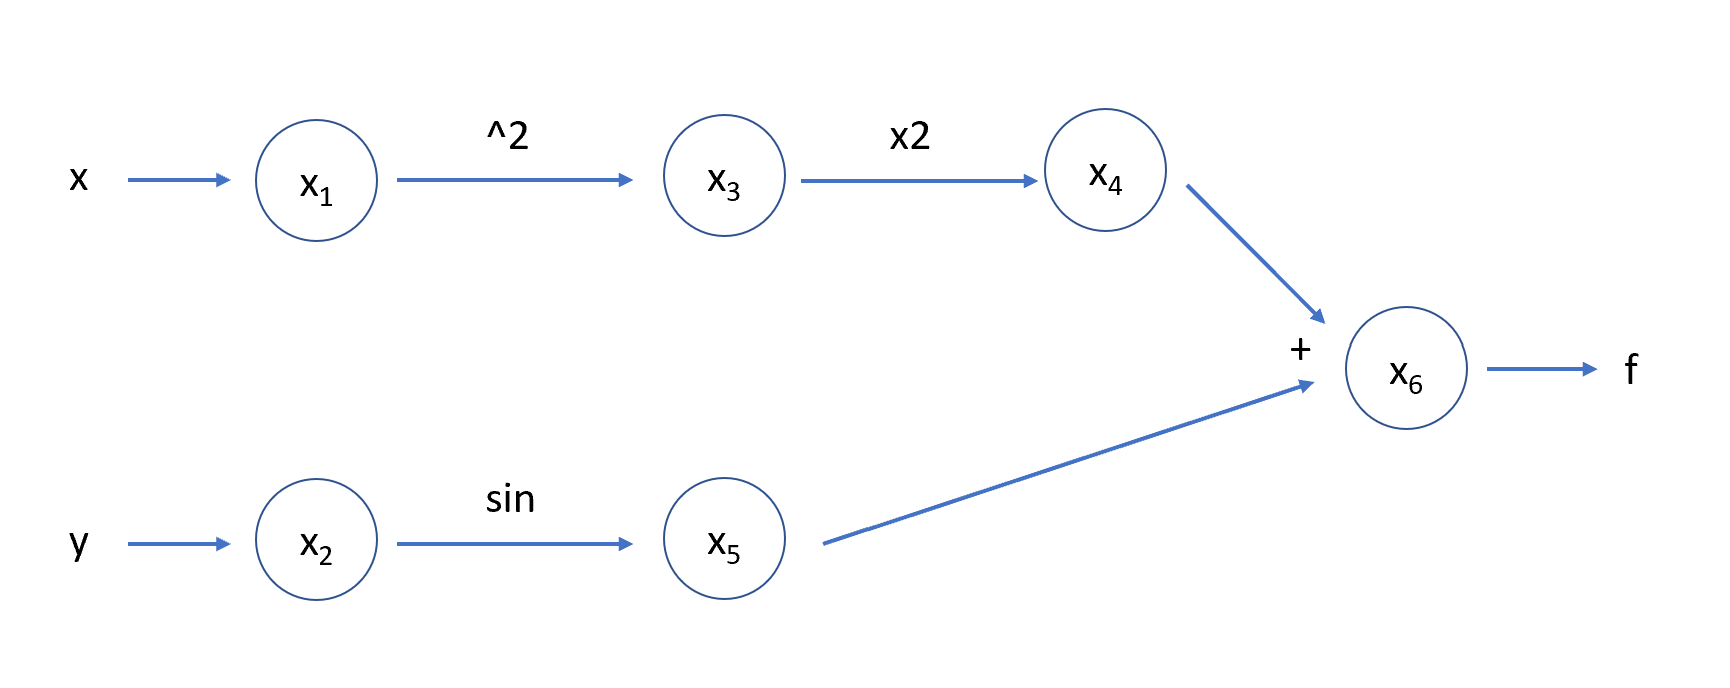

In execution, forward-mode AD actually computes $\nabla f \cdot p$. However, this needs to be calculated for each seed vector (there is one seed vector for each input variable). Therefore, the computational complexity of forward-mode AD is proportional to the number of input variables. Forward-mode automatic differentiation is more efficient for functions where $ m >> n$ for $f:\mathbb{R}^{n} \mapsto \mathbb{R}^{m} $



For Milestone 2, forward mode has been partially implemented. *OttoDiff* currently supports multiple input variables, but does not allow for multiple functions. In other words, for $f:\mathbb{R}^{n} \mapsto \mathbb{R}^{m} $, $n$ can be greater than 1, but $m$ cannot be greater than 1. The final submission will improve upon our current implementation to remove this limitation.

## How to Use *OttoDiff*

Our package has been posted to **PyPI** as `OttoDiff` to make installation easy for users. Users can install our package by typing:

`pip install OttoDiff`

The file `requirements.txt` contains dependent packages that the user needs to be able to run OttoDiff (such as numpy>=1.14.3). 

The user should then import the package to use it:

`import OttoDiff`

Then the user defines a function that needs to be differentiated and creates an function object from our package that takes into argument these function. 

## Software Organization

Directory structure:
```
OttoDiff/
	__init__.py
	README.md
	requirements.txt
	setup.py
	Test/
	Utility/
		forward.py
		reverse.py
		duals.py
		advanced_features.py
	Docs/
		milestone1.md
```

The names of the modules speak for their functionality. We use different modules to make it easier to work at the same time on different codes. We don’t have choose our idea for advanced feature yet. We will try to use the two test suite TravisCI and CodeCov then select only the best to use. We will distribute our package on Pypi, it is also a setup tool that will package our software. Hence users can use the pip install command.

## Implementation

We will use the basic data structures on python. We will implement a dual number class, and a function class. The function class will have attributes to evaluate the values of the function and of its derivatives. The dual class will have two attributes for the real and the imaginary part.

We will rely on numpy for some evaluations, notably for the elementary functions. To handle their derivatives, we will use two methods. The first one is with the dual numbers and we will use the well-known taylor series of this elementary functions. The second method is to use their symbolic derivatives which are also well known.


## Future Features